In [2]:
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

In [45]:
S = []
L = [] # log scale
import math

pliki = []
for i in range(3,8):
    plik = "gra" + str(i)
    pliki.append(plik)
    f = open(plik).readlines()
    for j in f:
        S.append([int(j.split()[0]), plik])
        L.append([math.log10(int(j.split()[0])), plik, i])
df = pd.DataFrame(S)
df_log = pd.DataFrame(L)


In [46]:
df.columns = ["liczba_ruchów", "rozmiar_planszy"]
df_log.columns = ["log_liczby_ruchów", "rozmiar_planszy", "plansza"]
#print(df.head)
print(df_log.head)

<bound method NDFrame.head of      log_liczby_ruchów rozmiar_planszy  plansza
0             1.278754            gra3        3
1             1.113943            gra3        3
2             1.000000            gra3        3
3             1.414973            gra3        3
4             1.301030            gra3        3
5             1.176091            gra3        3
6             1.204120            gra3        3
7             1.204120            gra3        3
8             1.462398            gra3        3
9             1.204120            gra3        3
10            1.278754            gra3        3
11            0.954243            gra3        3
12            1.204120            gra3        3
13            1.397940            gra3        3
14            1.278754            gra3        3
15            1.361728            gra3        3
16            1.204120            gra3        3
17            1.113943            gra3        3
18            1.380211            gra3        3
19        

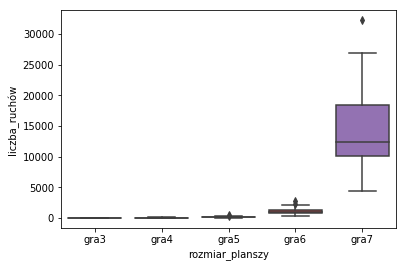

In [6]:
sns.boxplot(x=df["rozmiar_planszy"], y=df["liczba_ruchów"])

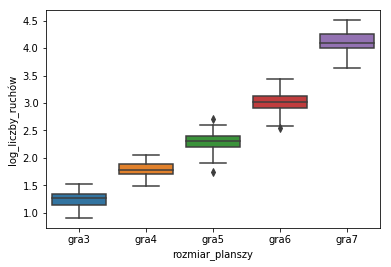

In [7]:
sns.boxplot(x=df_log["rozmiar_planszy"], y=df_log["log_liczby_ruchów"])

/home/albert/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


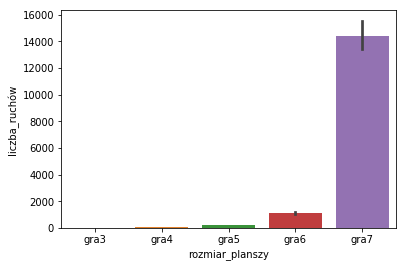

In [8]:
sns.barplot(x=df["rozmiar_planszy"], y=df["liczba_ruchów"])


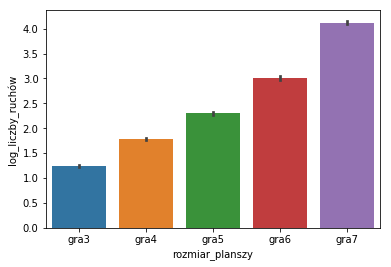

In [9]:
sns.barplot(x=df_log["rozmiar_planszy"], y=df_log["log_liczby_ruchów"])

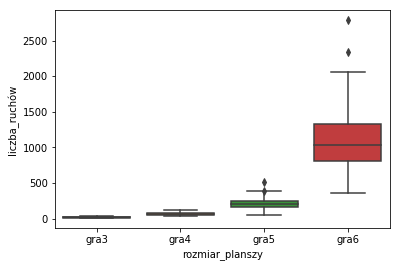

In [10]:

# df
sns.boxplot(x=df["rozmiar_planszy"], y=df["liczba_ruchów"])

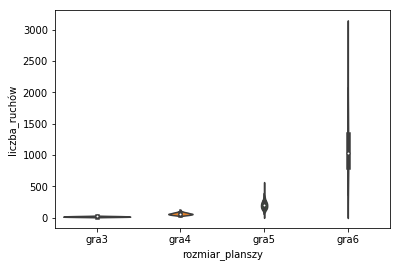

In [11]:
sns.violinplot(x=df["rozmiar_planszy"], y=df["liczba_ruchów"])

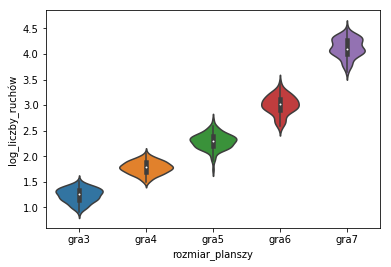

In [12]:
sns.violinplot(x=df_log["rozmiar_planszy"], y=df_log["log_liczby_ruchów"])

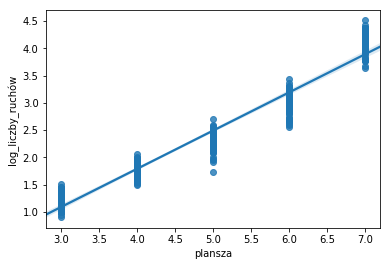

In [13]:
sns.regplot(y=df_log["log_liczby_ruchów"], x=df_log["plansza"],  ci=99.999)

In [14]:
import statsmodels.api as sm

In [17]:
df_log.head()

,log_liczby_ruchów,rozmiar_planszy,plansza
0,1.278754,gra3,3
1,1.113943,gra3,3
2,1.000000,gra3,3
3,1.414973,gra3,3
4,1.301030,gra3,3


In [18]:
X = df_log['plansza']
y = df_log['log_liczby_ruchów']

In [19]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_liczby_ruchów   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.746e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:57:00   Log-Likelihood:                -197.59
No. Observations:                 500   AIC:                             397.2
Df Residuals:                     499   BIC:                             401.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
plansza        0.5129      0.003    165.715      0.000       0.507       0.519
==============================================================================
Omnibus:                       62.595   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.799
Skew:                           1.007   Prob(JB):                     3.86e-19
Kurtosis:                       3.101   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

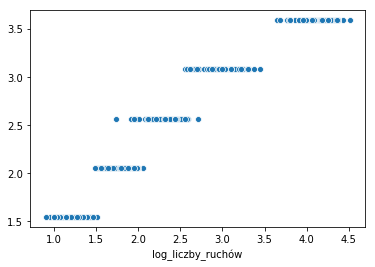

In [23]:
sns.scatterplot(x = y, y=predictions)

/home/albert/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


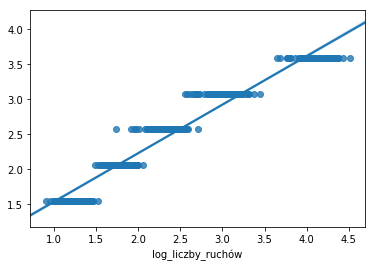

In [26]:
sns.regplot(x = y, y=predictions)

In [47]:
for i in range(2, 15):
    print(i, 10**model.predict(i)) 

2 [10.6111094]
3 [34.56536823]
4 [112.59564261]
5 [366.77690364]
6 [1194.76468119]
7 [3891.90984836]
8 [12677.77873429]
9 [41297.48115918]
10 [134525.29704432]
11 [438212.09034775]
12 [1427462.64342895]
13 [4649916.42920703]
14 [15146962.26772796]


In [48]:
df[df["rozmiar_planszy"]=="gra7"]["liczba_ruchów"].mean()

14437.26